In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression\\ASPRS\\FingerLakes'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read Field dataset 
Data0 = pd.read_csv('data_raw/Indices/FingerLakes.csv')

# Remove none values
Data = Data0.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(Data)

     Unnamed: 0  Year  Month  Day      2BDA      3BDA      NDCI        B1  \
0           200  2017      7    3  0.912575 -0.084196 -0.049463  0.160814   
1           201  2017      7    3  0.919797 -0.077209 -0.041808  0.180428   
2           282  2017      8   19  0.865965 -0.134743 -0.071927  0.158669   
3           388  2018      7    3  0.876471 -0.133994 -0.066039  0.107397   
4           389  2018      7    5  0.806616  0.016263  0.006623  0.230924   
..          ...   ...    ...  ...       ...       ...       ...       ...   
112        1450  2020      9   20  0.940167 -0.059841 -0.034770  0.117000   
113        1451  2020      9   20  0.937430 -0.060636 -0.035975  0.117417   
114        1455  2020      9   20  0.860895 -0.138232 -0.074871  0.107421   
115        1456  2020      9   20  0.865806 -0.129911 -0.072058  0.110141   
116        1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810   

          B10       B11  ...        B6        B7        B8       B8A  \
0  

In [5]:
# Return the natural logarithm of Chl-a (Y)
Data['LnChl-a']=np.log(Data['Chl-a'])
print(Data)

     Unnamed: 0  Year  Month  Day      2BDA      3BDA      NDCI        B1  \
0           200  2017      7    3  0.912575 -0.084196 -0.049463  0.160814   
1           201  2017      7    3  0.919797 -0.077209 -0.041808  0.180428   
2           282  2017      8   19  0.865965 -0.134743 -0.071927  0.158669   
3           388  2018      7    3  0.876471 -0.133994 -0.066039  0.107397   
4           389  2018      7    5  0.806616  0.016263  0.006623  0.230924   
..          ...   ...    ...  ...       ...       ...       ...       ...   
112        1450  2020      9   20  0.940167 -0.059841 -0.034770  0.117000   
113        1451  2020      9   20  0.937430 -0.060636 -0.035975  0.117417   
114        1455  2020      9   20  0.860895 -0.138232 -0.074871  0.107421   
115        1456  2020      9   20  0.865806 -0.129911 -0.072058  0.110141   
116        1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810   

          B10       B11  ...        B7        B8       B8A        B9  \
0  

In [6]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'LnChl-a']

# get the summary
desc_data = Data [list].describe()

# add the standard deviation metric
desc_data.loc['+3_std'] = desc_data.loc['mean'] + (desc_data.loc['std'] * 3)
desc_data.loc['-3_std'] = desc_data.loc['mean'] - (desc_data.loc['std'] * 3)

# display it
desc_data

,2BDA,3BDA,LnChl-a
count,117.000000,117.000000,117.000000
mean,0.926077,-0.071347,1.318743
std,0.069430,0.074212,0.880799
min,0.796202,-0.173236,-1.473160
25%,0.874731,-0.131772,0.828552
50%,0.910392,-0.092735,1.376749
75%,0.964004,-0.033550,1.954445
max,1.082229,0.110278,3.209229
+3_std,1.134367,0.151288,3.961140
-3_std,0.717788,-0.293982,-1.323654


In [7]:
# Pearson Coefficient 
corr = Data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,3BDA,LnChl-a
2BDA,1.000000,0.951575,0.051453
3BDA,0.951575,1.000000,0.127457
LnChl-a,0.051453,0.127457,1.000000


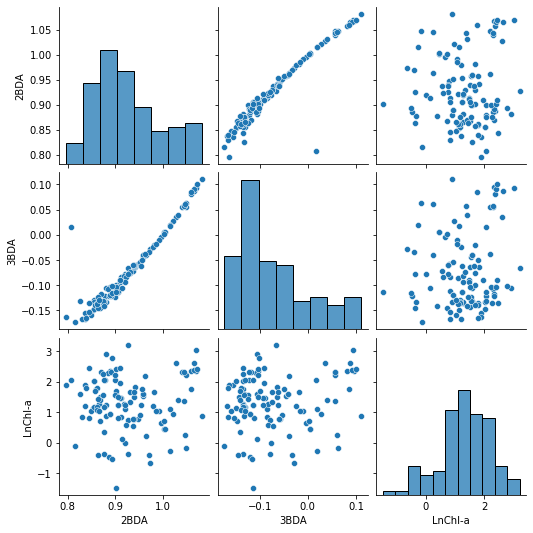

In [8]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data[list])

In [9]:
# Getting column names
X_columns = ["2BDA", "3BDA"]
Y = Data["LnChl-a"]

In [10]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Data[X_columns[0:2]].values, i) for i in range(Data[X_columns[0:2]].shape[1])]
vif["features"] = Data[X_columns[0:2]].columns

# display VIF
vif.round()

,VIF Factor,features
0,2.0,2BDA
1,2.0,3BDA


In [12]:
# Extract independent variables (X) & dependent variable (Y)
X = Data[X_columns]
X = add_constant(X)
Y = Data['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     3.222
Date:                Wed, 02 Mar 2022   Prob (F-statistic):             0.0452
Time:                        17:56:38   Log-Likelihood:                -94.103
No. Observations:                  81   AIC:                             194.2
Df Residuals:                      78   BIC:                             201.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0214      3.569      2.808      0.0

In [13]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 69     1.313595
46     1.124579
58     1.189118
114    1.415839
73     1.384673
98     1.216011
31     1.773177
53     1.255499
65     1.244732
96     1.285463
95     1.214311
97     1.427416
2      1.395353
62     1.327202
110    1.164832
55     1.255798
103    1.219474
100    1.414081
66     1.171101
44     1.417193
77     1.493473
17     1.231128
81     1.338458
74     1.181827
56     1.264564
94     1.577713
35     1.217353
38     1.141631
93     1.343124
48     1.194605
33     1.165530
59     1.179062
92     1.200421
42     1.291154
10     1.424425
85     1.259414
dtype: float64


In [14]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 7.01
MAE 2.36
RMSE 2.65


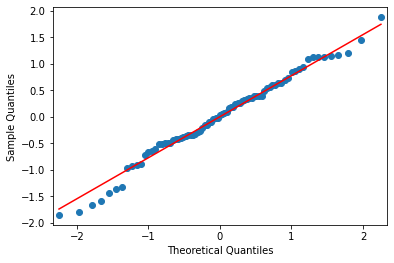

The mean of the residuals is -3.468e-15


In [15]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [16]:
# MergedData: Threshold  Chl-a < 2
Data1 = Data.loc[(Data["LnChl-a"] > 0.6931)]
Data1.shape

(96, 26)

In [17]:
# get the summary
desc_data1 = Data1 [list].describe()

# add the standard deviation metric
desc_data1.loc['+3_std'] = desc_data1.loc['mean'] + (desc_data1.loc['std'] * 3)
desc_data1.loc['-3_std'] = desc_data1.loc['mean'] - (desc_data1.loc['std'] * 3)

# display it
desc_data1

,2BDA,3BDA,LnChl-a
count,96.000000,96.000000,96.000000
mean,0.922930,-0.073282,1.624022
std,0.070653,0.075521,0.604424
min,0.796202,-0.167801,0.704087
25%,0.868419,-0.132168,1.155214
50%,0.905896,-0.100478,1.557091
75%,0.957728,-0.040492,2.067999
max,1.082229,0.110278,3.209229
+3_std,1.134888,0.153281,3.437294
-3_std,0.710971,-0.299845,-0.189250


In [18]:
# Pearson Coefficient 
corr1 = Data1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,3BDA,LnChl-a
2BDA,1.000000,0.945179,0.169320
3BDA,0.945179,1.000000,0.246864
LnChl-a,0.169320,0.246864,1.000000


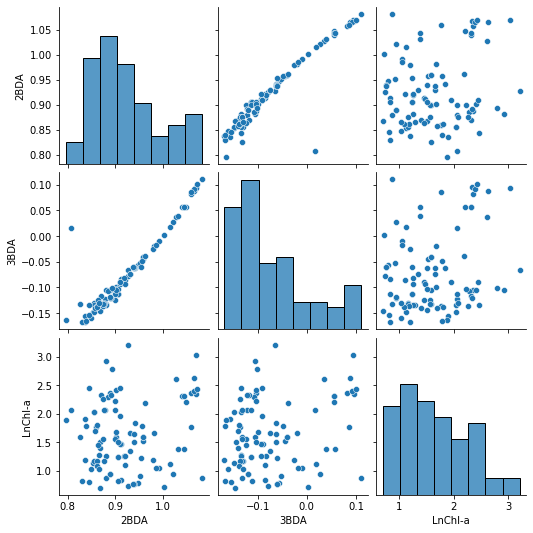

In [19]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data1[list])

In [20]:
# Extract independent variables (X) & dependent variable (Y)
X = Data1[X_columns]
X = add_constant(X)
Y = Data1['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     5.616
Date:                Wed, 02 Mar 2022   Prob (F-statistic):            0.00566
Time:                        17:57:29   Log-Likelihood:                -56.541
No. Observations:                  67   AIC:                             119.1
Df Residuals:                      64   BIC:                             125.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5554      6.261      2.485      0.0

In [21]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 46     1.363067
35     2.218677
52     1.484166
69     1.323496
95     2.194884
89     1.759729
76     1.508906
50     1.263243
98     1.610209
105    2.263104
72     1.456463
30     1.619186
112    1.586722
92     1.335986
36     1.999801
64     1.398508
45     1.666265
12     1.463631
4      4.619031
44     1.615437
62     1.319511
67     1.477306
21     1.431363
110    1.961350
116    1.617302
39     1.809978
37     1.590241
56     1.308700
104    2.191323
dtype: float64


In [22]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 3.56e+02
MAE 6.94
RMSE 18.9


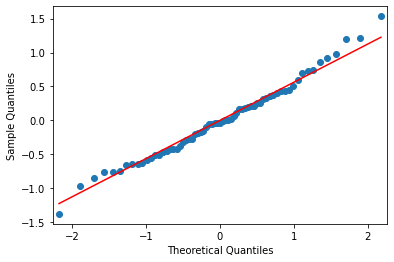

The mean of the residuals is -4.035e-15


In [23]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [24]:
# MergedData: Threshold  Chl-a > 8
Data2 = Data.loc[(Data["LnChl-a"] > 2.0794)]
Data2.shape

(23, 26)

In [25]:
# Descriptive statistics of all variables
list = ['2BDA', '3BDA', 'LnChl-a']

# get the summary
desc_data2 = Data2 [list].describe()

# add the standard deviation metric
desc_data2.loc['+3_std'] = desc_data2.loc['mean'] + (desc_data2.loc['std'] * 3)
desc_data2.loc['-3_std'] = desc_data2.loc['mean'] - (desc_data2.loc['std'] * 3)

# display it
desc_data2

,2BDA,3BDA,LnChl-a
count,23.000000,23.000000,23.000000
mean,0.964529,-0.025062,2.471272
std,0.084977,0.093199,0.273217
min,0.843901,-0.135495,2.181998
25%,0.889503,-0.104556,2.311643
50%,0.927337,-0.065664,2.357831
75%,1.053191,0.068992,2.535809
max,1.070283,0.100207,3.209229
+3_std,1.219460,0.254534,3.290924
-3_std,0.709598,-0.304658,1.651620


In [26]:
# Pearson Coefficient 
corr2 = Data2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,3BDA,LnChl-a
2BDA,1.000000,0.994939,0.008813
3BDA,0.994939,1.000000,0.037139
LnChl-a,0.008813,0.037139,1.000000


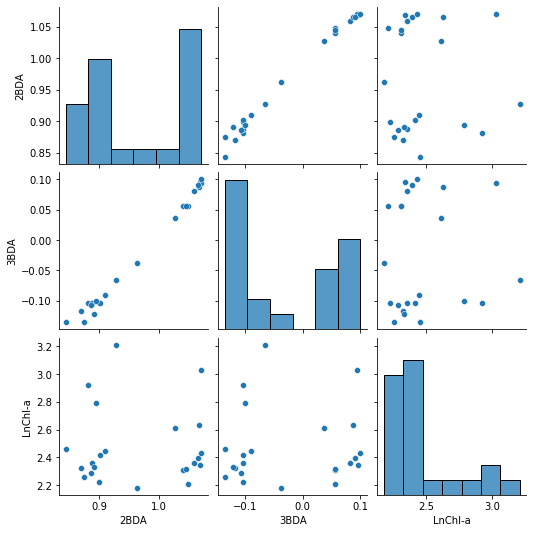

In [27]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data2[list])

In [28]:
# Extract independent variables (X) & dependent variable (Y)
X = Data2[X_columns]
X = add_constant(X)
Y = Data2['LnChl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                LnChl-a   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.6366
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.545
Time:                        17:58:06   Log-Likelihood:               -0.62712
No. Observations:                  16   AIC:                             7.254
Df Residuals:                      13   BIC:                             9.572
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1066     10.202      1.187      0.2

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [29]:
# Get predictions
LnY_predict = result.predict(X_test)
print('Natural logarithm of predicted Y:', LnY_predict)

Natural logarithm of predicted Y: 101    2.461008
89     2.737652
33     2.363031
69     2.431935
98     2.377698
87     2.318444
58     2.420764
dtype: float64


In [30]:
import math

Y_predict = np.exp(LnY_predict)

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 86.7
MAE 9.17
RMSE 9.31


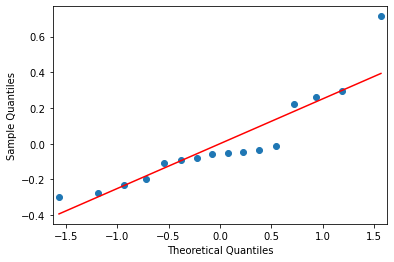

The mean of the residuals is -9.603e-15


In [31]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))